# Explore

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk.sentiment
import wrangle

**Prep data**

In [2]:
train, val, test = wrangle.wrangle_glassdoor()

In [3]:
train.head()

,url,pros,cons,name,rating,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
490,https://www.glassdoor.com/Reviews/Perficient-R...,Perficient is an ethical company that actually...,"None at all, love, love, love this company!\nI...",Perficient,4.1,perficient is an ethical company that actually...,perficient ethical company actually value empl...,none at all love love love this company\nit is...,none love love love company good company canno...,Four,4
273,https://www.glassdoor.com/Reviews/Farmers-Insu...,"This company is the best ever.\nLarge, establi...",I have nothing bad to say.\nManagement company...,Farmers Insurance Group,3.4,this company is the best ever\nlarge establish...,company best ever large established company so...,i have nothing bad to say\nmanagement company ...,nothing bad say management company get paid re...,Three,3
30,https://www.glassdoor.com/Reviews/MIT-Reviews-...,"Very inspiring place to work at, to feel that ...",Depends on the project to how much organizatio...,MIT,4.4,very inspiring place to work at to feel that s...,inspiring place work feel something new happen...,depends on the project to how much organizatio...,depends project much organization team include...,Four,4
406,https://www.glassdoor.com/Reviews/Morningstar-...,"- Coworkers are amicable, and they're overall ...",- Base pay for the area could be slightly high...,Morningstar,4.1,coworkers are amicable and they ' re overall v...,coworkers amicable ' overall supportive unlimi...,base pay for the area could be slightly higher...,base pay area could slightly higher bonus prog...,Four,4
163,https://www.glassdoor.com/Reviews/ICF-Reviews-...,Loved the job and the people. Great flexibilit...,"None, I would fully recommend\nThere was disho...",ICF,3.8,loved the job and the people great flexibility...,loved job people great flexibility fun project...,none i would fully recommend\nthere was dishon...,none would fully recommend dishonest hidden in...,Three,3


In [4]:
train = train[train['binned_rating_int'] == 3]

**Trigram generator**

In [5]:
def generate_trigrams(lemmatized):
    words = lemmatized.split()
    trigrams = []

    if len(words) < 3:
        return trigrams

    for i in range(len(words) - 1):
        if len(words[i]) > 1 and len(words[i+1]) > 1:
            trigram = " ".join(words[i:i+3])
            trigrams.append(trigram)

    return trigrams

**Bin ratting**

In [6]:
# Define bin edges
bin_edges = [2.0, 2.9, 3.9, 4.9]

# Define bin labels
bin_labels = ['Two', 'Three', 'Four']

# Bin the 'Values' column
train['binned_rating'] = pd.cut(train['rating'], bins=bin_edges, labels=bin_labels)
train.head(2)

,url,pros,cons,name,rating,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
273,https://www.glassdoor.com/Reviews/Farmers-Insu...,"This company is the best ever.\nLarge, establi...",I have nothing bad to say.\nManagement company...,Farmers Insurance Group,3.4,this company is the best ever\nlarge establish...,company best ever large established company so...,i have nothing bad to say\nmanagement company ...,nothing bad say management company get paid re...,Three,3
163,https://www.glassdoor.com/Reviews/ICF-Reviews-...,Loved the job and the people. Great flexibilit...,"None, I would fully recommend\nThere was disho...",ICF,3.8,loved the job and the people great flexibility...,loved job people great flexibility fun project...,none i would fully recommend\nthere was dishon...,none would fully recommend dishonest hidden in...,Three,3


## 1. Are there differences in word/words distribution between different binned star rating categories?

- Are there specific keywords that frequently appear in reviews associated with higher or lower star ratings?

### Pros Trigram

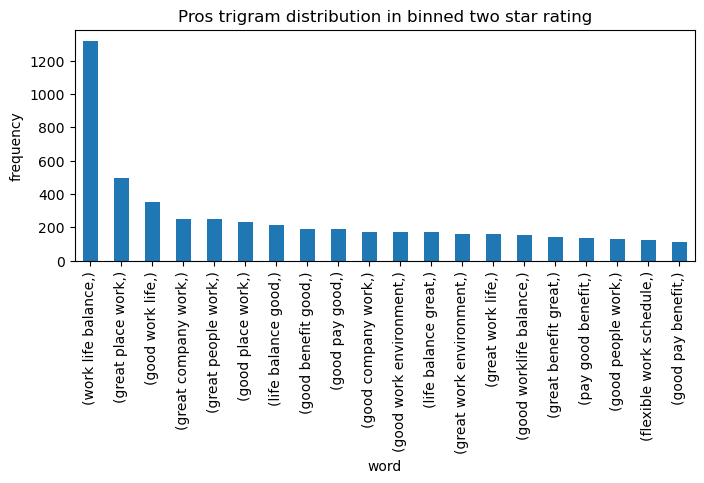

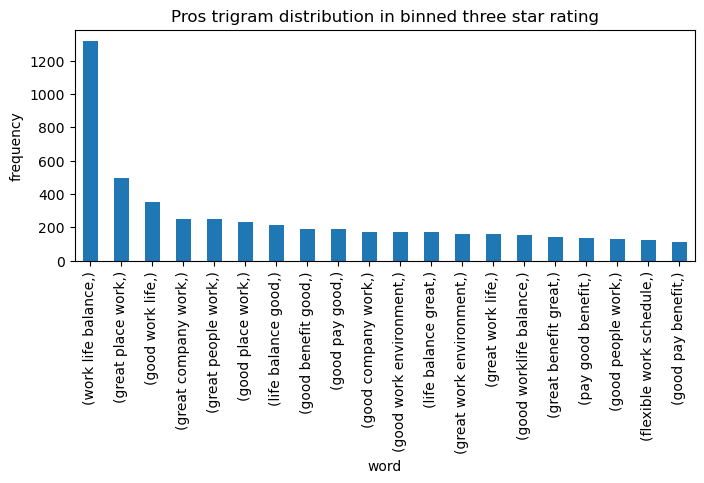

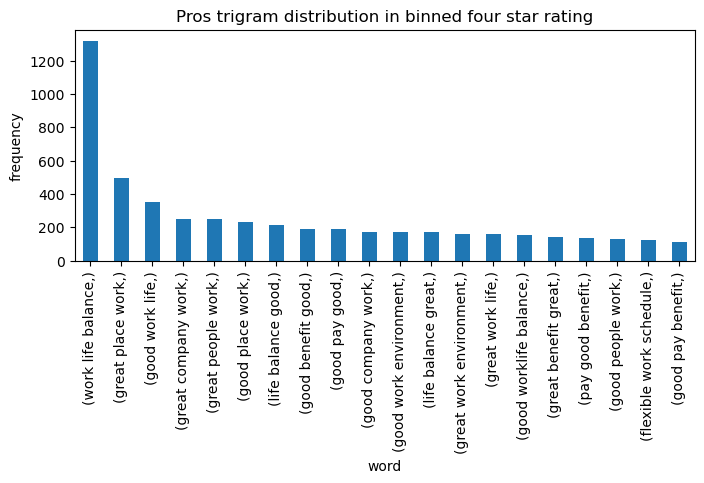

In [9]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating_int == 3]
    trigram = generate_trigrams(" ".join(bin_data.values))
    trigram_df = pd.DataFrame({'star_trigrams': trigram})
    
    
    # Calculate word counts
    pd.Series(trigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Pros trigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

### Cons trigram

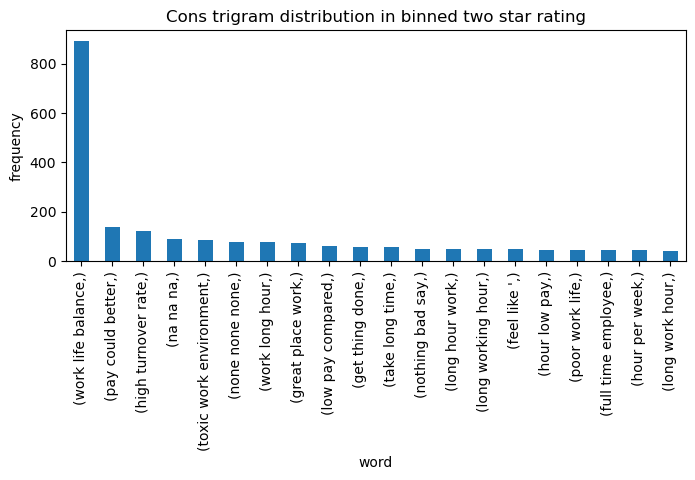

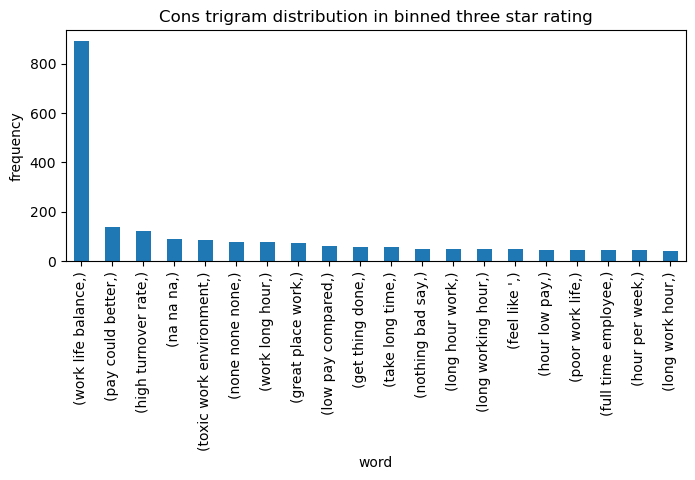

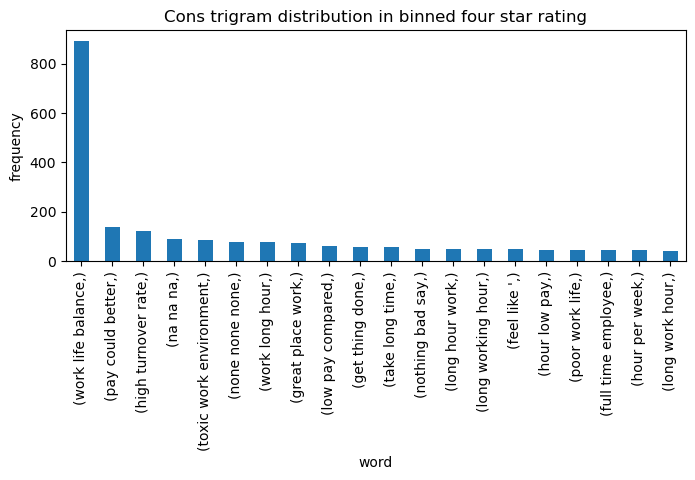

In [11]:
for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating_int == 3]
    trigram = generate_trigrams(" ".join(bin_data.values))
    trigram_df = pd.DataFrame({'star_trigrams': trigram})
    
    
    # Calculate word counts
    pd.Series(trigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Cons trigram distribution in binned {i.lower()} star rating")
    plt.xlabel("word")
    plt.ylabel("frequency")
    plt.show()

## 2. Are reviews generally more positive in the pros section and more negative in the cons section, or is there a mix of sentiments?
- What are the most common positive themes mentioned in the pros reviews?
- What are the most common negative themes mentioned in the cons reviews?

In [12]:
# combine all the pros/cons revies as one string
pros_trigrams = generate_trigrams(" ".join(train.pros_lemmatized.values))
cons_trigrams = generate_trigrams(" ".join(train.cons_lemmatized.values))
# add list of trigrams to a dataframe
pros_trigrams = pd.DataFrame({'comb_pros_trigrams': pros_trigrams})
cons_trigrams = pd.DataFrame({'comb_cons_trigrams': cons_trigrams})
pros_trigrams.head(3)

,comb_pros_trigrams
0,company best ever
1,best ever large
2,ever large established


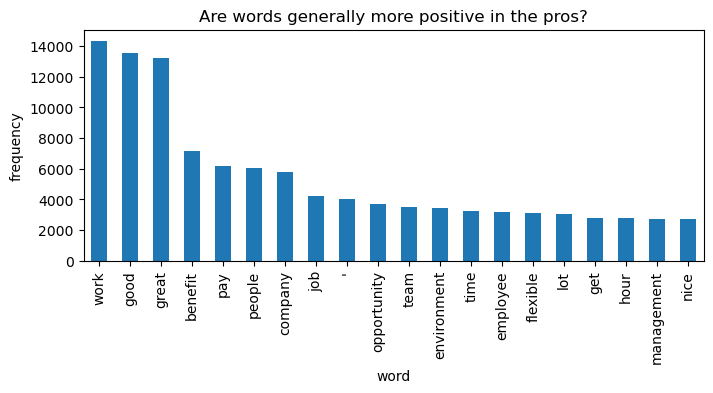

In [13]:
plt.figure(figsize=(8,3))
pd.Series(" ".join(train.pros_lemmatized.values).split()).value_counts().head(20).plot(kind="bar")
plt.title(f"Are words generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Pros trigram

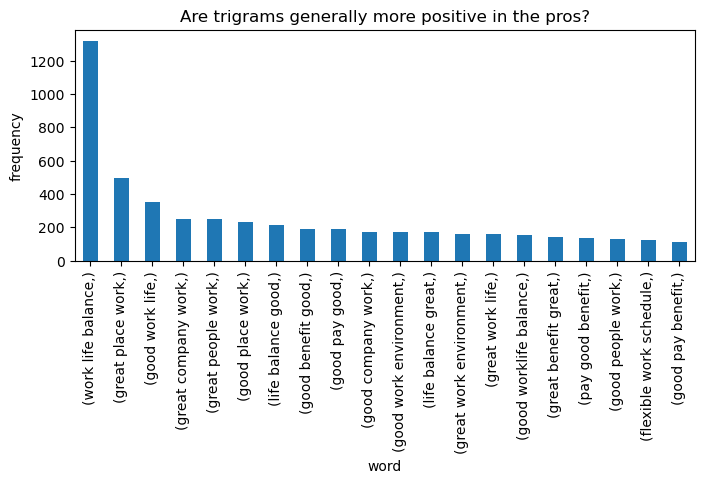

In [14]:
plt.figure(figsize=(8,3))
pd.Series(pros_trigrams.value_counts().head(20).plot(kind="bar"))
plt.title(f"Are trigrams generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

### Cons trigram

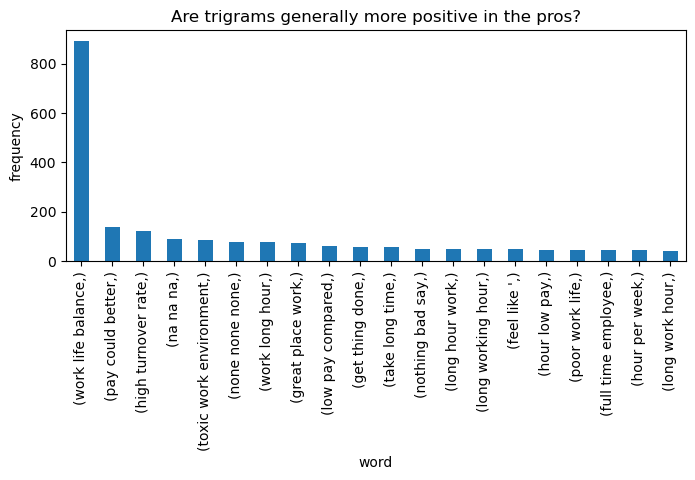

In [15]:
plt.figure(figsize=(8,3))
pd.Series(cons_trigrams.value_counts().head(20).plot(kind="bar"))
plt.title(f"Are trigrams generally more positive in the pros?")
plt.xlabel("word")
plt.ylabel("frequency")
plt.show()

## 3. Do longer reviews have more impanct to the overall star rating compared to shorter reviews?

**Pros**

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

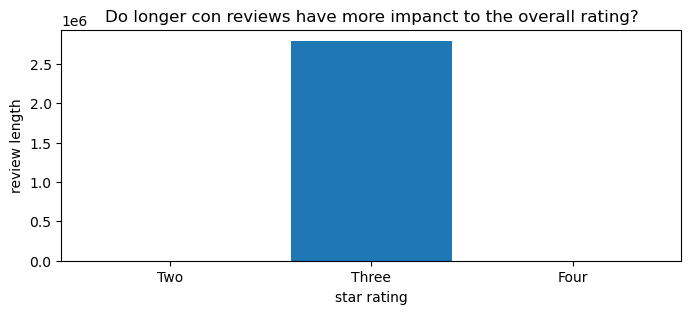

In [16]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer con reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

In [17]:
# Define bin edges
bin_edges = [2.0, 2.9, 3.9, 4.9]

# Define bin labels
bin_labels = ['Two', 'Three', 'Four']

# Bin the 'Values' column
train['binned_rating'] = pd.cut(train['rating'], bins=bin_edges, labels=bin_labels)
train.head(2)

,url,pros,cons,name,rating,pros_cleaned,pros_lemmatized,cons_cleaned,cons_lemmatized,binned_rating,binned_rating_int
273,https://www.glassdoor.com/Reviews/Farmers-Insu...,"This company is the best ever.\nLarge, establi...",I have nothing bad to say.\nManagement company...,Farmers Insurance Group,3.4,this company is the best ever\nlarge establish...,company best ever large established company so...,i have nothing bad to say\nmanagement company ...,nothing bad say management company get paid re...,Three,3
163,https://www.glassdoor.com/Reviews/ICF-Reviews-...,Loved the job and the people. Great flexibilit...,"None, I would fully recommend\nThere was disho...",ICF,3.8,loved the job and the people great flexibility...,loved job people great flexibility fun project...,none i would fully recommend\nthere was dishon...,none would fully recommend dishonest hidden in...,Three,3


<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

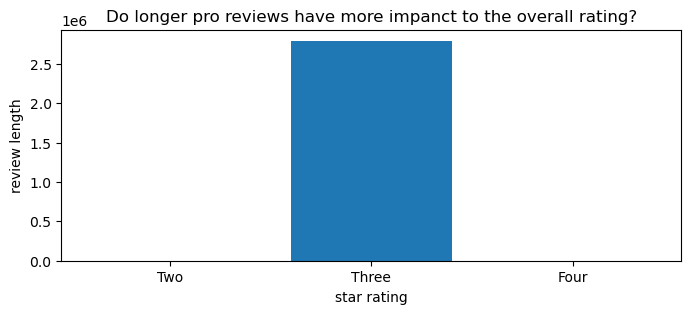

In [18]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.pros_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer pro reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

### Cons

<Figure size 800x300 with 0 Axes>

<Figure size 800x300 with 0 Axes>

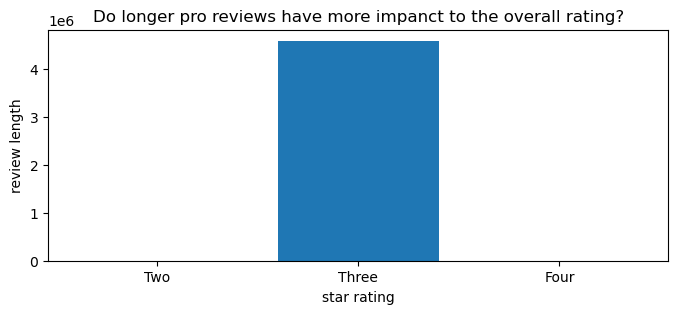

In [19]:
len_star_review = []

for i in bin_labels:
    plt.figure(figsize=(8,3))
    bin_data = train.cons_lemmatized[train.binned_rating == i]
    len_star_pros = len(" ".join(bin_data.values))
    len_star_review.append(len_star_pros)
    
# Calculate word counts
plt.bar(x=bin_labels, height=len_star_review)
plt.title("Do longer pro reviews have more impanct to the overall rating?")
plt.xlabel("star rating")
plt.ylabel("review length")
plt.show()

## 4. Are there instances where reviews express positive sentiments despite lower star ratings or vice versa?

In [20]:
# Define bin labels
low_bin_labels = ['Two', 'Three', "Four"]
high_bin_labels = ['Four']

### Low stars and positive sentiment (Combined pros Trigram and cons Trigram for each star)

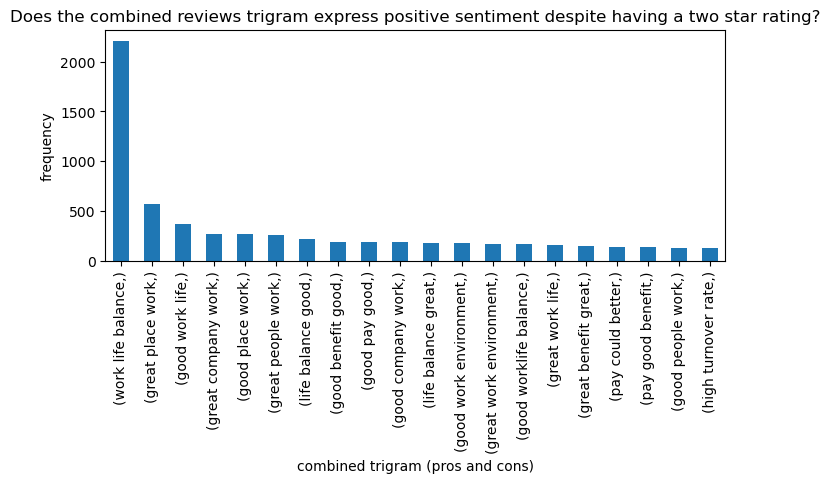

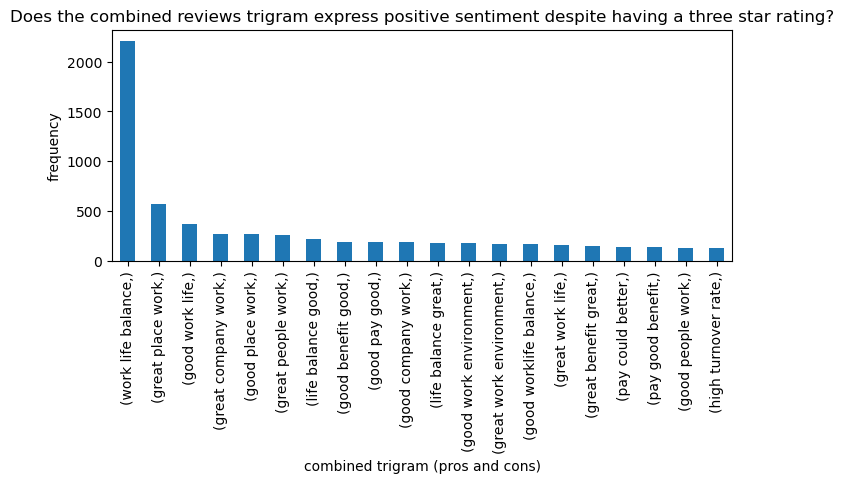

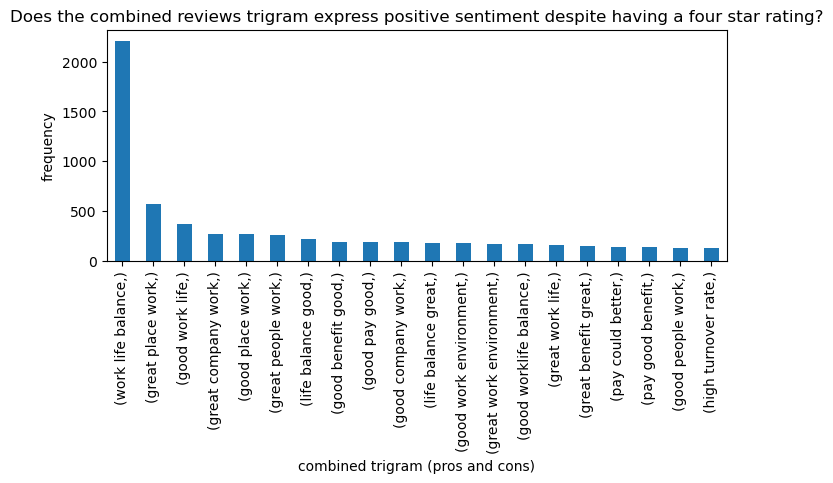

In [22]:
for i in low_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating_int == 3].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating_int == 3].values)
    pros_cons = pros + " " + cons
    # split into trigrams
    pros_cons_trigram = generate_trigrams(pros_cons)
    pros_cons_trigram_df = pd.DataFrame({'pros cons Trigram': pros_cons_trigram})
    
    # Calculate word counts
    pd.Series(pros_cons_trigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Does the combined reviews trigram express positive sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined trigram (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

### high stars and negative sentiment (Combined pros Trigram and cons Trigram for each star)

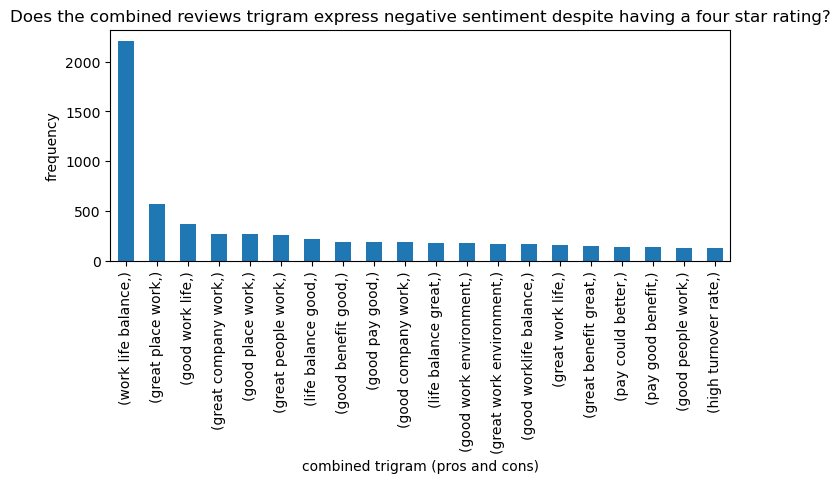

In [24]:
for i in high_bin_labels:
    plt.figure(figsize=(8,3))
    # conbine the pros and cons for each star
    pros = " ".join(train.pros_lemmatized[train.binned_rating_int == 3].values)
    cons = " ".join(train.cons_lemmatized[train.binned_rating_int == 3].values)
    pros_cons = pros + " " + cons
    # split into trigrams
    pros_cons_trigram = generate_trigrams(pros_cons)
    pros_cons_trigram_df = pd.DataFrame({'pros cons trigram': pros_cons_trigram})
    
    # Calculate word counts
    pd.Series(pros_cons_trigram_df.value_counts().head(20).plot(kind="bar"))
    plt.title(f"Does the combined reviews trigram express negative sentiment despite having a {i.lower()} star rating?")
    plt.xlabel("combined trigram (pros and cons)")
    plt.ylabel("frequency")
    plt.show()

## 5. Are there any words that uniquely identify pros and cons?

### Pros trigram

In [25]:
# get the word frequencies for each category
pros_tri_freq = pd.Series(generate_trigrams(" ".join(train.pros_lemmatized.values))).value_counts()
cons_tri_freq = pd.Series(generate_trigrams(" ".join(train.cons_lemmatized.values))).value_counts()
pros_cons_str = " ".join(train.cons_lemmatized.values) + " ".join(train.pros_lemmatized.values)
all_tri_freq = pd.Series(generate_trigrams(pros_cons_str)).value_counts()
all_tri_freq

work life balance              2211
great place work                570
good work life                  366
great company work              265
good place work                 264
                               ... 
employee sometimes schedule       1
sometimes schedule flexible       1
schedule flexible even            1
flexible even tho                 1
employee well                     1
Length: 768946, dtype: int64

In [26]:
# concat all frequencies together into a dataframe
tri_word_freq= pd.concat([pros_tri_freq, cons_tri_freq, all_tri_freq], axis=1).fillna(0).astype(int)
tri_word_freq.columns = ['pros_tri_freq', 'cons_tri_freq', 'all_tri_freq']

tri_word_freq

,pros_tri_freq,cons_tri_freq,all_tri_freq
work life balance,1320,891,2211
great place work,495,75,570
good work life,352,14,366
great company work,250,15,265
great people work,249,4,253
...,...,...,...
eventually allowed move,0,1,1
goal time,0,1,0
goal timecompany best,0,0,1
timecompany best ever,0,0,1


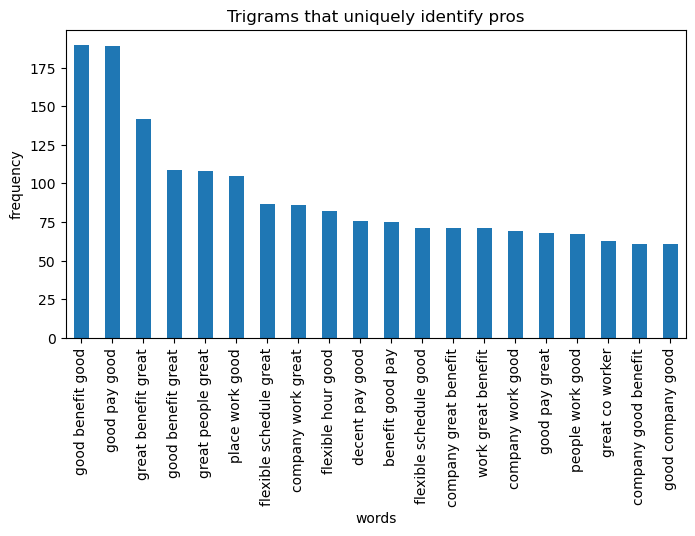

In [27]:
tri_word_freq.pros_tri_freq[tri_word_freq.cons_tri_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Trigrams that uniquely identify pros")
plt.xlabel("words")
plt.ylabel("frequency")
plt.show()

### Cons trigram

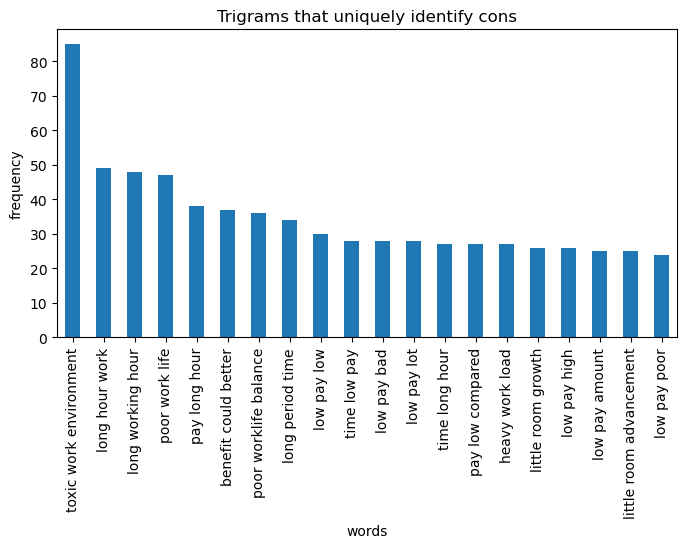

In [28]:
tri_word_freq.cons_tri_freq[tri_word_freq.pros_tri_freq == 0].head(20).plot(kind="bar", figsize=(8,4))
plt.title("Trigrams that uniquely identify cons")
plt.xlabel("words")
plt.ylabel("frequency")
plt.show()

### 6. What are the top words found in both pros and cons

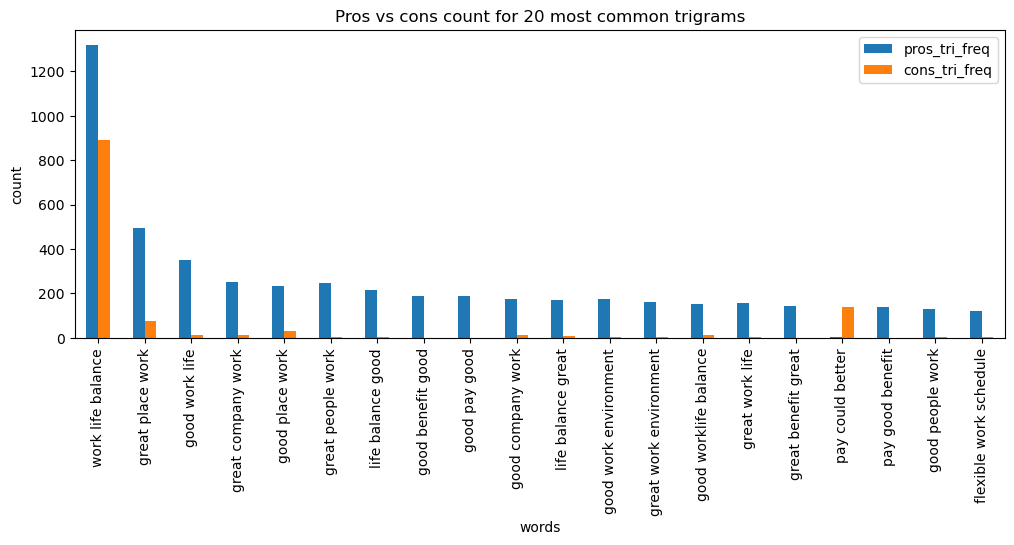

In [29]:
# plot most common words
tri_word_freq.sort_values('all_tri_freq', ascending=False)[['pros_tri_freq', 'cons_tri_freq']].head(20).plot(kind="bar", figsize=(12,4))
plt.title("Pros vs cons count for 20 most common trigrams")
plt.xlabel("words")
plt.ylabel("count")
plt.show()

## Take aways

## With more time
- word count
- stopword count
- punctuation count
- average word length
- average words per sentence
- word to stopword ratio